# 4.10 - further visualizations

In [1]:
# importing librariesa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\Noah\4.3.24_INSTACART BASKET ANALYSIS"

In [3]:
# 1. importing new dataset
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data', '4.10_instacart.pkl'))

In [28]:
print(ords_prods_merge.head(0))

Empty DataFrame
Columns: [user_id, First Name, Surname, Gender, State, Age, date_joined, Dependents, fam_status, income, product_id, product_name, aisle_id, department_id, prices, order_id, eval_set, order_number, orders_day_of_the_week, order_hour_of_day, days_since_prior_order, add_to_cart_order, reordered, _merge, price_range_loc, busiest_day, busiest_period_of_day, max_order, loyalty_flag, spending_level, loyalty_flag_spending, median_days_since_prior, loyalty_flag_freq, department_name]
Index: []

[0 rows x 34 columns]


In [82]:
ords_prods_merge.head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,Dependents,fam_status,income,...,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_level,loyalty_flag_spending,median_days_since_prior,loyalty_flag_freq,department_name,Region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Average Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,beverages,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,beverages,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,beverages,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Average Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,produce,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Least busy,Most Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,produce,Midwest


# 2. security implications

The personal information of each customer is to be considered PII. In this case, I would not disclose any information that identifies a customer as an individual; including their user ID. The only people I would share this information with are those designated as having verified clearance from Instacart to see the info. 

# 3. regional behavior

CPU is overtaxed - creating sample df to help with computing

In [4]:
# creating sample size since data set is too big for CPU
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [5]:
big = ords_prods_merge[dev]

In [6]:
small = ords_prods_merge[~dev]

In [ ]:
# Define the Region function
def Region(State):
    if State in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        return 'Northeast'
    elif State in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        return 'Midwest'
    elif State in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        return 'South'
    elif State in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        return 'West'
    else:
        return 'Unknown'

In [36]:
# superimposing the Region on State
ords_prods_merge.loc[:, 'Region'] = ords_prods_merge['State'].apply(Region)


In [37]:
# Create a subset of small containing only 'Region' and 'spending_level' columns
df_region_spend = ords_prods_merge[['Region', 'spending_level']]

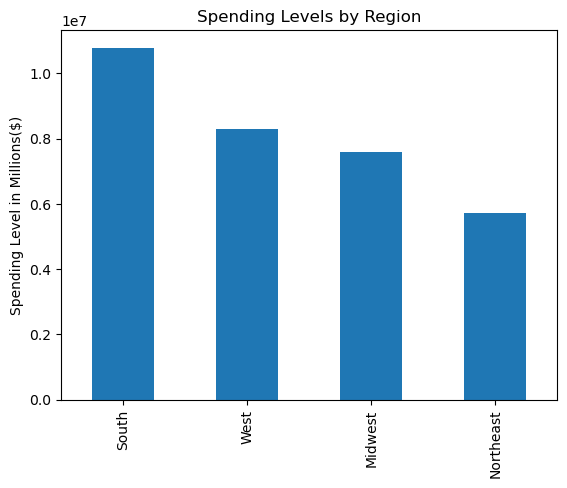

In [38]:
df_region_spend['Region'].value_counts().sort_values(ascending=False).plot.bar()

plt.title('Spending Levels by Region')
plt.xlabel('')
plt.ylabel('Spending Level in Millions($)')

# Display the plot
plt.show()

Here we can see that the South spends on average the most overall. The Northeast spends the least.


# 4. exclusion flag for low activity customers

In [39]:
#creating new df with no customers @ less than 5 orders
df_nolow = ords_prods_merge[ords_prods_merge['max_order'] >= 5].dropna()

In [40]:
df_nolow.describe()

,user_id,Age,Dependents,income,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,spending_level,median_days_since_prior
count,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07,2.929868e+07
mean,1.029221e+05,4.946595e+01,1.501896e+00,9.969985e+04,2.559660e+04,7.118073e+01,9.923272e+00,7.791182e+00,1.710381e+06,1.878881e+01,2.742905e+00,1.340085e+01,1.081017e+01,8.362296e+00,6.404588e-01,3.527519e+01,7.789949e+00,9.744532e+00
std,5.947105e+04,1.848511e+01,1.118971e+00,4.312489e+04,1.408050e+04,3.822346e+01,6.282717e+00,4.240489e+00,9.873536e+05,1.765303e+01,2.087242e+00,4.248612e+00,8.578530e+00,7.138961e+00,4.798660e-01,2.497630e+01,7.186440e-01,6.502091e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00
25%,5.139600e+04,3.300000e+01,1.000000e+00,6.734500e+04,1.354100e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.555440e+05,6.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.500000e+01,7.386709e+00,6.000000e+00
50%,1.025650e+05,4.900000e+01,2.000000e+00,9.677600e+04,2.527200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710452e+06,1.300000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.900000e+01,7.811966e+00,7.000000e+00
75%,1.543780e+05,6.500000e+01,3.000000e+00,1.281030e+05,3.794300e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565311e+06,2.600000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.900000e+01,8.222293e+00,1.200000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.011429e+01,3.000000e+01


In [41]:
row_count_nolow = len(df_nolow)
print(row_count_nolow)

29298683


In [42]:
#checking head - any data with less than 5 orders??
print(df_nolow[df_nolow['max_order'] < 5]a)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2076066833.py, line 2)

No customers remain within the new df that have created less than 5 orders. Since this is a large random sample, trends will still remain in this df as they appear in the larger ords_prods_merge. Therefore, it is OK to export and send to CFO.

In [ ]:
# export df_nolow
df_nolow.to_pickle(os.path.join(path, '05 Sent to Client', 'no_customers_under5_orders.pkl'))

# 5. profiling variables

determining categories

In [ ]:
small.head(1)

In [47]:
# creating smaller chart using just variables we wish to examine
selected_columns = small[['Age', 'income','department_name','Dependents', 'orders_day_of_the_week','order_hour_of_day','busiest_day','busiest_period_of_day']]

In [ ]:
print(selected_columns.head(10))

In [ ]:
# creating aggregation for age groups
# age - youth, young adult, adult, senior

def Age_Group(Age):
    if 0 <= Age <= 22:
        return 'Youth'
    elif 23 <= Age <= 35:
        return 'Young Adult'
    elif 36 <= Age <= 61:
        return 'Adult'
    elif 62 <= Age <= 99:
        return 'Senior'
    else:
        return 'Unknown'

In [ ]:
# creating income aggregation
# income - low, middle, high
def income_level(income):
    if income < 60000:
        return 'Low Income'
    elif 60000 <= income < 150000:
        return 'Middle Income'
    elif income >= 150000:
        return 'High Income'
    else:
        return 'Unknown'

In [ ]:
# creating new columns for age group and income_level
selected_columns['Age_Group'] = selected_columns['Age'].apply(Age_Group)

In [ ]:
selected_columns['income_level'] = selected_columns['income'].apply(income_level)


In [ ]:
selected_columns.head(10)

We now have a new chart where our aggregations and groupings are in place. Now to profiling

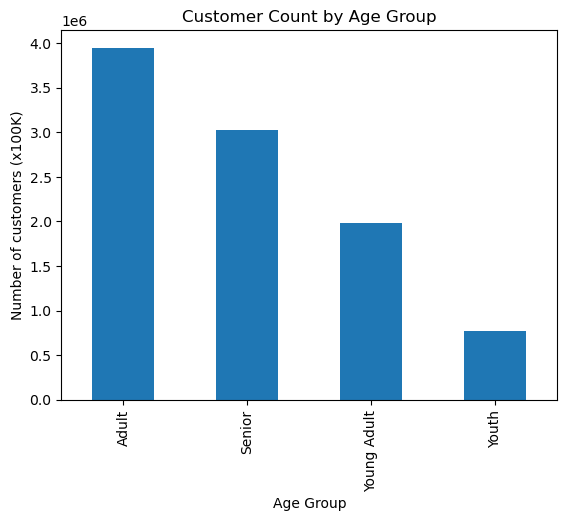

In [121]:
#plotting Age Groups - which has the most and the least?
selected_columns['Age_Group'].value_counts().plot.bar()
plt.xlabel('Age Group')
plt.ylabel('Number of customers (x100K)')
plt.title ('Customer Count by Age Group')
plt.show()

We see that most instacart customers are adults age 36 to 61

# Vizzes

# income by age group

In [125]:
# creating new df and sorting income into Age group buckets
grouped_data = selected_columns.groupby(['income_level','Age_Group']).size().unstack(fill_value=0)

In [126]:
# sorting in descending order
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

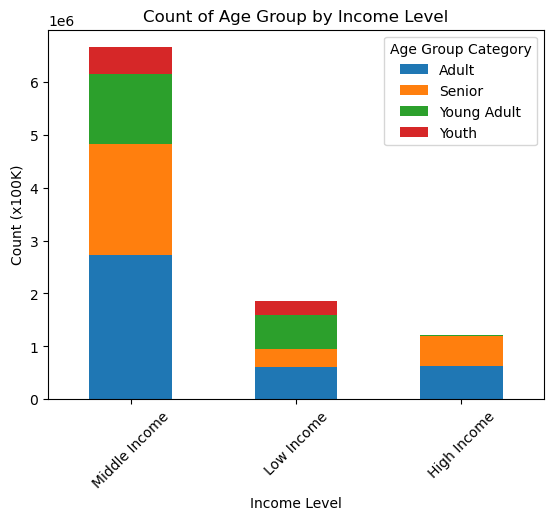

In [127]:
# bar chart that sorts customers by Age and income
bar_income_age = grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Income Level')
plt.ylabel('Count (x100K)')
plt.title('Count of Age Group by Income Level')
plt.xticks(rotation=45)
plt.legend(title='Age Group Category')
plt.show()

Here we see that the income level of Instacart customers fall mostly within the middle income - 60-150K.
We also see that adults and seniors represent nearly all of the high income customers.
Young adults and youths are more likely to be low income than any other age group

In [128]:
bar_income_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_age.png'))

# department purchases with day of the week filter

In [79]:
# grouping orders by department and which day of the week the order was placed
grouped_dept_dow = selected_columns.groupby(['department_name','orders_day_of_the_week']).size().unstack(fill_value=0)

In [80]:
# descending order
grouped_dept_dow = grouped_dept_dow.loc[grouped_dept_dow.sum(axis=1).sort_values(ascending=False).index]

<Figure size 1500x1500 with 0 Axes>

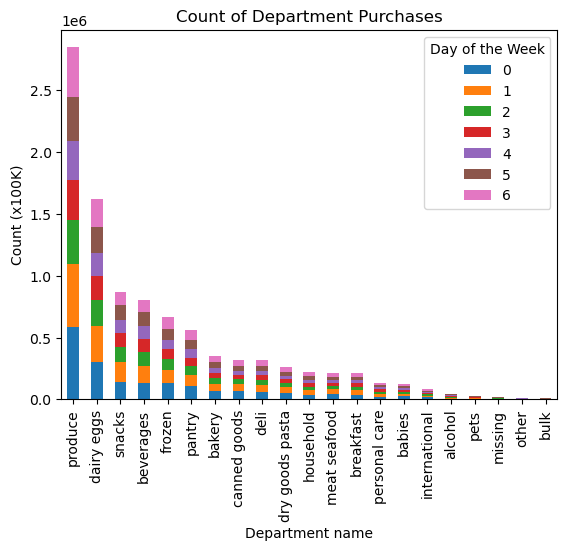

In [81]:
#plotting findings
plt.figure(figsize=(15, 15))
bar_dept_dow = grouped_dept_dow.plot(kind='bar', stacked=True)
plt.xlabel('Department name')
plt.ylabel('Count (x100K)')
plt.title('Count of Department Purchases')
plt.xticks(rotation=90)
plt.legend(title='Day of the Week')
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

plt.show()

Here we see that produce is bay far the most popular department for purchases. 
That, coupled with the dairy egg department, shows us most Instacart
purchases are for staple foods.

# Is there a correlation between number of dependents and income level?

In [188]:
#grouping by income and number of dependents
grouped_income_dependent = selected_columns.groupby(['income_level','Dependents']).size().unstack(fill_value=0)

In [190]:
#descending
grouped_income_dependent = grouped_income_dependent.loc[grouped_income_dependent.sum(axis=1).sort_values(ascending=False).index]

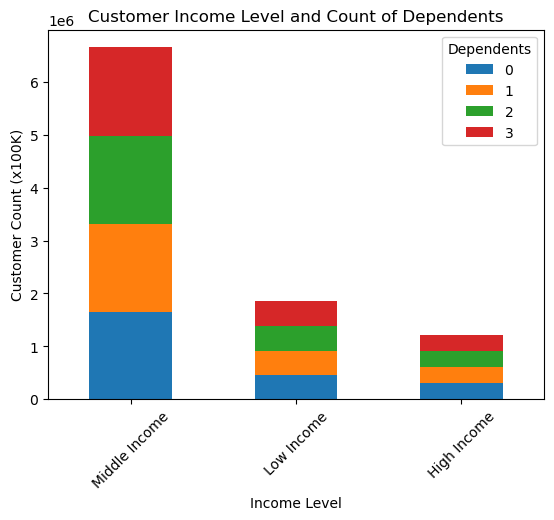

In [191]:
#plotting along income x axis and count y-axis broken down into number of dependents 
bar_income_dependent = grouped_income_dependent.plot(kind='bar', stacked=True)
plt.xlabel('Income Level')
plt.ylabel('Order Count (x100K)')
plt.title('Customer Income Level and Count of Dependents')
plt.xticks(rotation=45)
plt.legend(title='Dependents')
plt.show()

Most of our customers are from the middle income bracket.

# Do dependents determine when customer shop?

In [48]:
# creating grouped bar chart to split up Dependent counts
grouped_dependent_breakdown = selected_columns[selected_columns['Dependents'].isin([0, 1, 2, 3])]

In [49]:
# new df for when customers order
bar_dependent_breakdown = grouped_dependent_breakdown.groupby(['order_hour_of_day', 'Dependents']).size().unstack(fill_value=0)

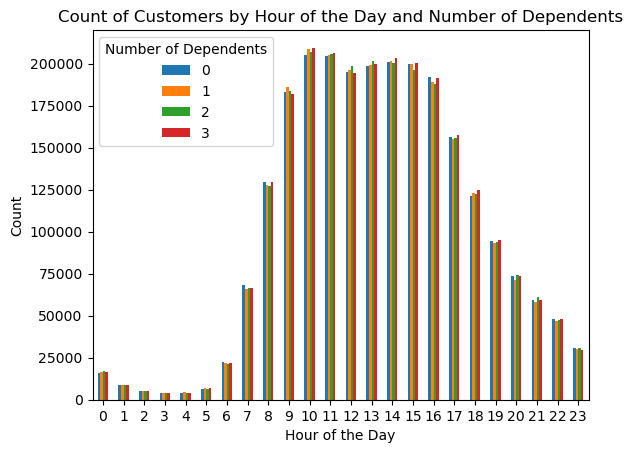

In [54]:
# bar chart for customer orders throughout the day with groupings by number of dependents
bar_dependent_breakdown.plot(kind='bar', stacked=False)
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Count of Customers by Hour of the Day and Number of Dependents')
plt.legend(title='Number of Dependents')
plt.xticks(rotation=0)
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hour_dependent_cnt.png'))

plt.show()

Number of dependents is not a significant factor in when customers shop.

In [52]:
bar_dependent_breakdown.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_dependent.png'))

AttributeError: 'DataFrame' object has no attribute 'figure'

# When do people with or without dependents shop? 

In [177]:
# df for day of week and number of dependents
grouped_depend_dow = selected_columns.groupby(['orders_day_of_the_week','Dependents']).size().unstack(fill_value=0)

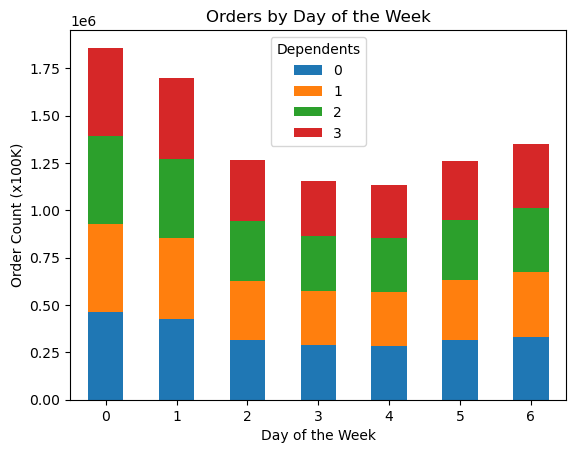

In [141]:
# bar chart - sorting orders chronological with further breakdown along Dependent data
bar_depend_dow = grouped_depend_dow.plot(kind='bar', stacked=True)
plt.xlabel('Day of the Week')
plt.ylabel('Order Count (x100K)')
plt.title('Orders by Day of the Week')
plt.xticks(rotation=0)
plt.legend(title='Dependents')
plt.show()

We cannot infer much from this chart as it is difficult to tell much from the visualization. 
A line chart will be easier to interpret.

In [147]:
#line chart should show us more interpretable info
df_line_dow_dep = selected_columns[['orders_day_of_the_week','Dependents']]

C:\Users\Noah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Noah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


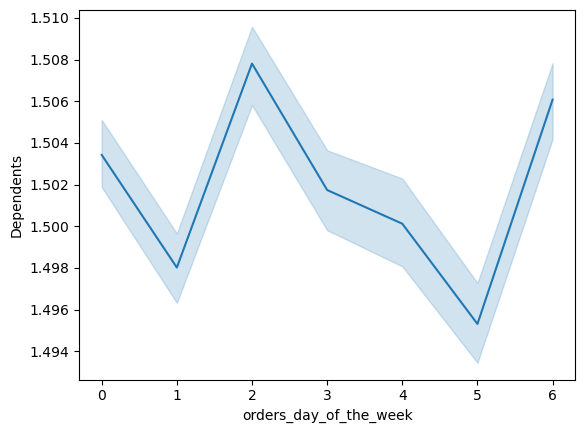

In [161]:
# placing order day and dependents on axes
line_income_dependent = sns.lineplot(data = selected_columns, x = 'orders_day_of_the_week',y = 'Dependents')

This chart shows us that people with more dependents tend to shop on Tuesday and Saturday, with Friday being the day where the least number of customers with dependents shop.

In [166]:
print(selected_columns['Dependents'].describe())

count    9.719609e+06
mean     1.501779e+00
std      1.118707e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Dependents, dtype: float64


In [167]:
line_income_dependent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_income_dependent.png'))

# Is there a correlation between days people shop and income?

In [168]:
# df for order day of week and income
df_line_dow_income = selected_columns[['orders_day_of_the_week','income']]

C:\Users\Noah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Noah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


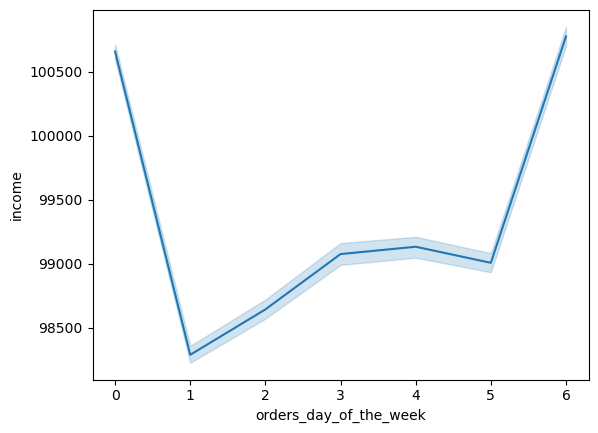

In [169]:
#determining axes
line_dow_income = sns.lineplot(data = selected_columns, x = 'orders_day_of_the_week',y = 'income')

Here we see that people with higher income shop on Sunday and Saturday. Lower income customers purchase the most on Monday.

In [170]:
line_dow_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_income.png'))

# Does this correlate to prices of products purchase? AKA, do wealthier people buy more expensive products?

In [171]:
# new df to show when prices are high or low
df_line_dow_prices = small[['orders_day_of_the_week','prices']]

C:\Users\Noah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Noah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


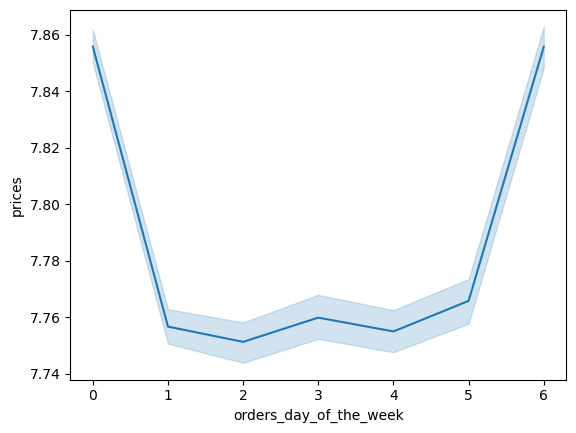

In [173]:
line_dow_prices = sns.lineplot(data = df_line_dow_prices, x = 'orders_day_of_the_week', y= 'prices')

We also see that prices of goods purchased go up on the same days that customers with higher incomes make purchases. 
We can infer a correlation between customers with higher incomes and more expensive goods being purchased. 


In [174]:
line_dow_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

# hour of the day - Who is shopping and when?

In [161]:
selected_columns.head(0)

,Age,income,department_name,Dependents,orders_day_of_the_week,order_hour_of_day,busiest_day,busiest_period_of_day


# Hours of operations - breakdown by number of dependents

In [156]:
# df for number of dependents during hours of operation
grouped_hour_depend = selected_columns.groupby(['order_hour_of_day','Dependents']).size().unstack(fill_value=0)

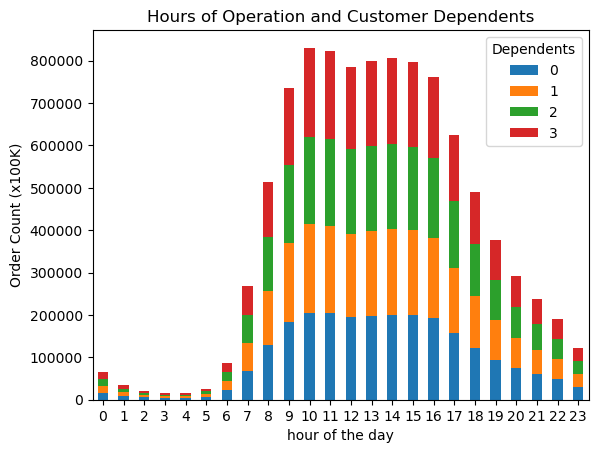

In [157]:
bar_hour_depend = grouped_hour_depend.plot(kind='bar', stacked=True)
plt.xlabel('hour of the day')
plt.ylabel('Order Count (x100K)')
plt.title('Hours of Operation and Customer Dependents')
plt.xticks(rotation=0)
plt.legend(title='Dependents')
plt.show()

It appears that customers unanimously favor the late morning and early afternoon hours regardless of dependents.

# Hours of operations - breakdown by income level

In [159]:
bar_hour_depend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hour_dependent.png'))

In [171]:
# df for income level during hours of operation
grouped_hour_income = selected_columns.groupby(['order_hour_of_day','income_level']).size().unstack(fill_value=0)

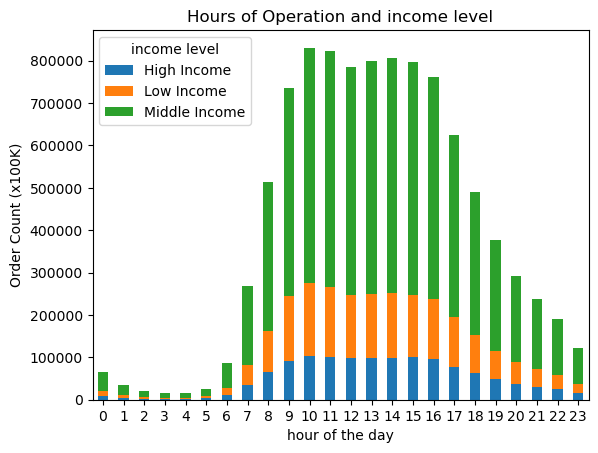

In [173]:
bar_hour_income = grouped_hour_income.plot(kind='bar', stacked=True)
plt.xlabel('hour of the day')
plt.ylabel('Order Count (x100K)')
plt.title('Hours of Operation and income level')
plt.xticks(rotation=0)
plt.legend(title='income level')
plt.show()

Middle income customers spike tremendously through the busiest hours of the day. High and low income customers also jump up during these hours.

In [174]:
bar_hour_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hour_income.png'))

# Hours of operations - breakdown by Age Group

In [176]:
grouped_hour_age = selected_columns.groupby(['order_hour_of_day','Age_Group']).size().unstack(fill_value=0)

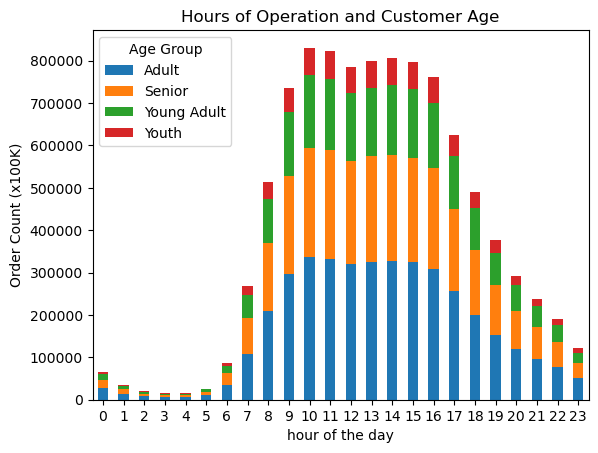

In [178]:
bar_hour_age = grouped_hour_age.plot(kind='bar', stacked=True)
plt.xlabel('hour of the day')
plt.ylabel('Order Count (x100K)')
plt.title('Hours of Operation and Customer Age')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.show()

All customer groups purchase along lines of general population- more in the midday and less in off hours.

In [179]:
bar_hour_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hour_age.png'))

# 7.  aggregate max, mean, min on customer profile level for usage freq. and expenditure

In [64]:
# choosing columns to aggregate
small.head(1)

,user_id,First Name,Surname,Gender,State,Age,date_joined,Dependents,fam_status,income,...,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_level,loyalty_flag_spending,median_days_since_prior,loyalty_flag_freq,department_name
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest day,Average Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,beverages


In [65]:
#selecting from entire dataset
print(ords_prods_merge.columns)

Index(['user_id', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'date_joined', 'Dependents', 'fam_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'eval_set', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_level',
       'loyalty_flag_spending', 'median_days_since_prior', 'loyalty_flag_freq',
       'department_name', 'Region'],
      dtype='object')


In [6]:
#creating new df for just columns we want
df_agg = ords_prods_merge[['user_id','prices','days_since_prior_order']]

In [106]:
df_agg.head(10)

,user_id,prices,days_since_prior_order
0,26711,9.0,30.0
1,26711,9.0,11.0
2,26711,9.0,10.0
3,26711,4.3,NaN
4,26711,4.3,30.0
5,26711,4.3,19.0
6,26711,4.3,30.0
7,26711,4.3,21.0
8,26711,4.3,11.0
9,26711,4.3,10.0


In [7]:
# creating aggregation for min, max, mean
aggregations = {
    'days_since_prior_order': ['max','min','mean'],
    'prices': ['max','min','mean']
}

In [8]:
print(aggregations)

{'days_since_prior_order': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']}


In [9]:
# printing aggregations for each user
df_result = df_agg.groupby('user_id').agg(aggregations)
print(df_result)

        days_since_prior_order                  prices               
                           max   min       mean    max  min      mean
user_id                                                              
1                         30.0   0.0  20.259259   14.0  1.0  6.367797
2                         30.0   3.0  15.967033   14.8  1.3  7.515897
3                         21.0   7.0  11.487179   14.4  1.3  8.197727
4                         21.0   0.0  15.357143   14.6  1.4  8.205556
5                         19.0  10.0  14.500000   14.8  3.2  9.189189
...                        ...   ...        ...    ...  ...       ...
206205                    30.0  10.0  20.666667   23.8  1.4  8.909375
206206                    15.0   0.0   4.042705   14.8  1.1  7.646667
206207                    30.0   1.0  14.879397   24.7  1.2  7.313453
206208                    20.0   0.0   7.442105   21.6  1.1  8.366617
206209                    30.0   3.0  20.275862   18.8  1.1  7.058915

[206209 rows x 6 co

In [13]:
df_result.head()

days_since_prior_order                  prices               
                           max   min       mean    max  min      mean
user_id                                                              
1                         30.0   0.0  20.259259   14.0  1.0  6.367797
2                         30.0   3.0  15.967033   14.8  1.3  7.515897
3                         21.0   7.0  11.487179   14.4  1.3  8.197727
4                         21.0   0.0  15.357143   14.6  1.4  8.205556
5                         19.0  10.0  14.500000   14.8  3.2  9.189189

In [14]:
#checking that all user_id's are accounted for - looking for 206209 rows
ords_prods_merge['user_id'].value_counts()

user_id
201268    3704
129928    3637
164055    3061
186704    2936
176478    2921
          ... 
52333        3
75721        3
124615       2
203875       2
91567        1
Name: count, Length: 206209, dtype: int64

# 8. Compare your customer profiles with regions and departments.

In [10]:
#flattening the column index so it can be merged with region and spending level data
df_result.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in df_result.columns]


In [11]:
df_result.head(5)

,days_since_prior_order_max,days_since_prior_order_min,days_since_prior_order_mean,prices_max,prices_min,prices_mean
user_id,,,,,,
1,30.0,0.0,20.259259,14.0,1.0,6.367797
2,30.0,3.0,15.967033,14.8,1.3,7.515897
3,21.0,7.0,11.487179,14.4,1.3,8.197727
4,21.0,0.0,15.357143,14.6,1.4,8.205556
5,19.0,10.0,14.500000,14.8,3.2,9.189189


In [57]:
# creating smaller df with just data we want 
df_reg_dept = ords_prods_merge[['user_id','Region','department_name']]

In [58]:
#merging new aggregated data to access region and department name data

merged_agg = pd.merge(df_result, df_reg_dept, on='user_id',how='left')

In [19]:
# testing dataset- results from one user
user_1_results = merged_agg[merged_agg['user_id'] == 1]

In [20]:
print(user_1_results)

    user_id  days_since_prior_order_max  days_since_prior_order_min  \
0         1                        30.0                         0.0   
1         1                        30.0                         0.0   
2         1                        30.0                         0.0   
3         1                        30.0                         0.0   
4         1                        30.0                         0.0   
5         1                        30.0                         0.0   
6         1                        30.0                         0.0   
7         1                        30.0                         0.0   
8         1                        30.0                         0.0   
9         1                        30.0                         0.0   
10        1                        30.0                         0.0   
11        1                        30.0                         0.0   
12        1                        30.0                         0.0   
13    

# we now have aggregated table, time for visualization

In [20]:
# for agg_spend_region bar chart- we need only the first instance of data for each customer since it is aggregated
df_first_instance = merged_agg.drop_duplicates(subset='user_id', keep='first')

# make a chart that compares the top 1000 users average spending in each region

In [103]:
# creating new df with region and mean prices sorted
df_orders_sorted = df_first_instance.sort_values(by=['Region', 'prices_mean'], ascending=[True, False])

In [104]:
# limiting the new df
top_users_by_region = df_orders_sorted.groupby('Region').head(10000)

In [105]:
# averaging the values 
avg_spend_by_region = top_users_by_region.groupby('Region')['prices_mean'].mean().sort_values(ascending=False)

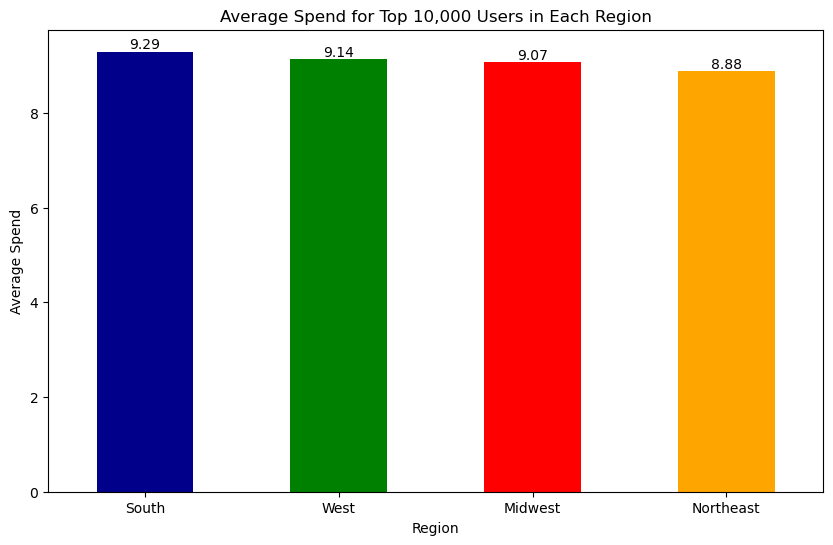

In [183]:
# plotting with color
plt.figure(figsize=(10, 6))
bar_top_10k_region = avg_spend_by_region.plot.bar(color = ['darkblue','green','red','orange'])
plt.xlabel('Region')
plt.ylabel('Average Spend')
plt.title('Average Spend for Top 10,000 Users in Each Region')
plt.xticks(rotation=0)
for bar in bars_top_10k.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()

We see here that among top 10,000 users from each region those in the South spend the most while top users in the Northeast spend the least.

In [184]:
bar_top_10k_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_10k_region.png'))

# How about average price spent in each department?

# which departments are the most expensive and which are the cheapest?

In [60]:
# creating a df where the prices are sorted by department name and average price
df_prices_sorted = merged_agg.sort_values(by=['department_name', 'prices_mean'], ascending=[True, False])

In [61]:
#averaging the average - finding out the average amount spent in a department by using prices_mean
bar_avg_spend_by_dept = df_prices_sorted.groupby('department_name')['prices_mean'].mean().sort_values(ascending=False)

In [62]:
# color coding in ascending order from dark to light for visual cue
colors = sns.color_palette("viridis", n_colors=len(bar_avg_spend_by_dept))

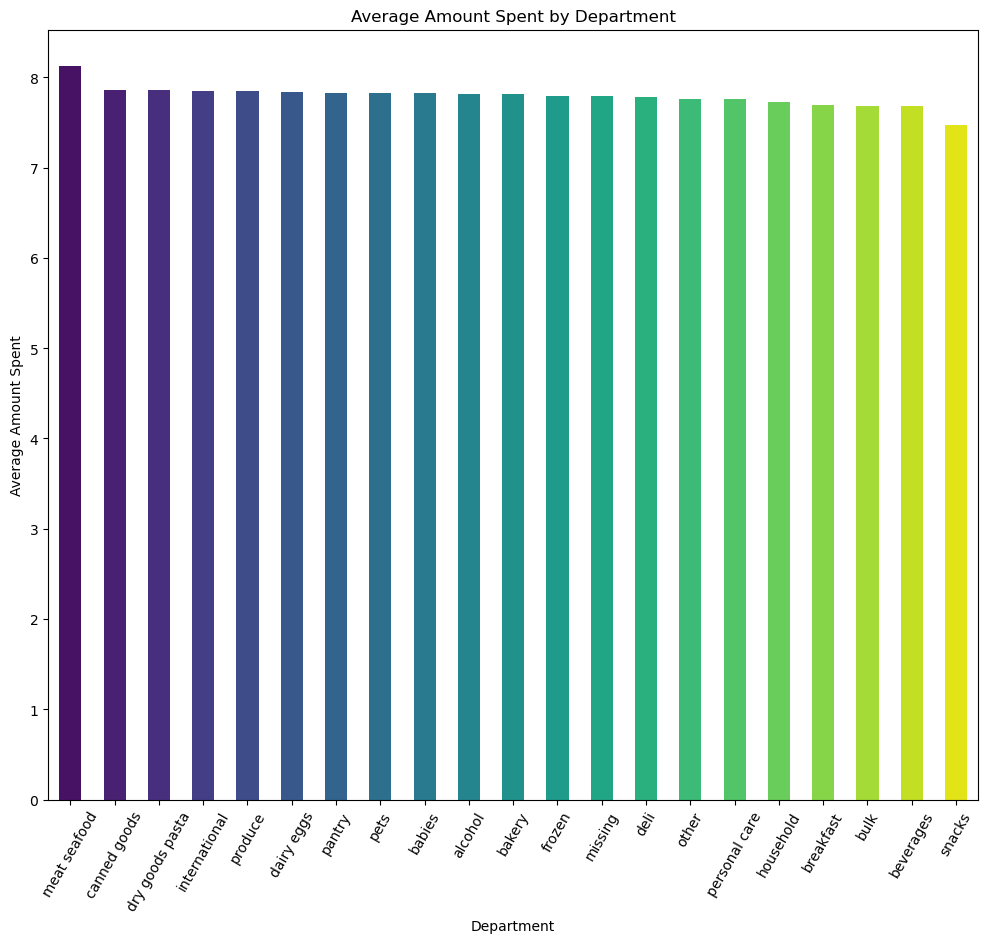

In [65]:
# plotting and exporting at same time with .gcf for pandas
plt.figure(figsize=(12, 10))
bar_avg_spend_by_dept.plot(kind='bar',color=colors)
plt.xlabel('Department')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent by Department')
plt.xticks(rotation=60)
# exporting chart with matplotlib
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_spend_by_dept.png'))

plt.show()

Here we see that customers on average spend the most in the "meat seafood" department and the least in the "snacks" department

In [14]:
row_count = len(ords_prods_merge)
print(row_count)

32399732


# exporting visualizations

In [18]:
# exporting relevant dfs
merged_agg.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10_merged_agg.pkl'))

In [19]:
ords_prods_merge.to_pickle(os.path.join(path,'02 Data', 'Prepared Data','final_instacart_data.pkl'))

In [21]:
df_first_instance.to_pickle(os.path.join(path,'02 Data', 'Prepared Data','4.10_first_instance_agg.pkl'))
